## Machine Learning

- Admin
    - Take-home exam grades out
    - HW1 peer-reviews due by the end of today
    - Presentation dates are set!
- Python is one of the premier languages for machine learning
    - one of the most extensive libraries used is `scikit-learn`
    - Can be used for:
    - Data processing 
    - Feature Selection
    - Models
    - Parameter Tuning


## What is machine learning?

- Rather than caring about how one particular variable affects the outcome, machine learning is about *prediction*.

$$
y = f(x;\varepsilon)
$$

- The goal is to get a get $\hat{y}$
- The different models we choose are basically trying to find a suitable function $f$.
    $f$ can be defined with a functional form (polynomial, linear) or through a complicated non-linear function (tree methods)

## Supervised vs. Unsupervised

- Machine learning can be broadly broken down into supervised, unsupervised, and reinforcement learning (not discussed here)
    - Supervised: There is a "target" or "label" to learn
        - In this case, $y$ is known and and $f$ is found
    - Unsupervised: No $y$; try to find patterns in the data

## Classification vs. Regression

- In machine learning there is natural division between problems: classification and regression
- This is determined by the form of $y$. 
    - If $y$, the label, is binary/categorical:  classification
        - If there are multiple categories (cat, dog, bird): multi-class
        - If something can be multiple labels at the same time (mammal, bird, reptile -> platypus): multi-label
    - If $y$ is continuous: regression
- Note: $y$ need not be a vector, you can predict multiple outcomes at the same time: multi-output

## Data

- Most data processing can be done in `pandas`
- `sklearn` plays well with `pandas` 
- Data quality is, as always, the most important thing with ML
    - Garbage in, garbage out
- All the skills you gained about data for econometrics applies to ML as well
    - This means, missing values, outliers, and measurement error
    - This can all have large effects on performance
- Additionally, `sklearn` provides functions for data processing such as normalization, "one-hot encoding" (creating dummies) and others
- `sklearn` provides tools for creating "pipelines" that feed data processing into models for reproducible flows


## The Basic ML Workflow

```mermaid
graph LR
    A[Data Cleaning] --> B[Data Processing] --> C["Data Split (Training/Test/Validation)"] --> D[Parameter Tuning] --> E[Model Training] --> F[Predict on Testing Set] --> G[Adjust]  --> B 
```

- Notice that you might need to iterate until you get to a model that is reliable and predicts well

## The Golden Rule for ML

- The most important rule in ML is about data contamination
    - No matter what you do, it's important to make sure that training data doesn't affect testing data in a way that might inadvertantly transfer information.
        - This can apply to the way you process data
            - Normalizing data using both training and testing dataset
            - Splitting data in a way that the same observations are in both (this can happens with hierarchical data)
            

## Data Splitting

- Data should be split at least into two parts:
    - Training and testing
    - All data processors should be fit on only the training data to minimize the chances of contamination
- Often there are parameters that need to be tuned and optimized in the model  
    - Training - Validation - Testing
    - Train and test on validation
        - Iterate and find best parameters
        - Then Train on Training + Validation and test on Testing

## Why isn't that enough?

- When you randomly split the data, the training and testing sets might just have specific features that you get in the "luck" of the draw
    - Perhaps your random sample has too much of a particular label, or too little of a particular variable
- To minimize this, you can split the data into multiple parts to minimize that any one split of the data has too much "specificity."
- This is called Kfold Splitting and training and testing on each subset is called *cross-validation*.

![](figures/sphx_glr_plot_cv_indices_002.png)

## Parameter Tuning

- Sometimes some models have extra parameters that need to be calibrated/tuned
- You can find this parameter using "grid-search" cross-validation
    - Essentially brute force search on different parameters settings and optimal numbers are found by cross-validation

## Getting Started

```
pip install scikit-learn
```

In [214]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Different scalers comparison: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.datasets import load_iris, make_regression, make_blobs, load_diabetes
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

## Unsupervised Learning

In [16]:
features, target =  make_blobs(n_samples=1000, centers=5)

In [23]:
model = KMeans(n_clusters=5)

y_pred = model.fit_predict(features)

/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

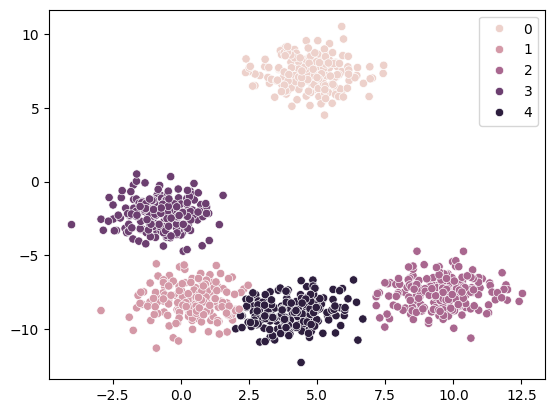

In [24]:
sns.scatterplot(x = features[:, 0], y=features[:,1], hue = y_pred)

## Supervised Learning

-  For this one, let's focus on a linear model that can "regularize", and set some coefficients to 0.
- This is called a L-1 regularized linear model or lasso model


$$
\hat{\beta} = \argmin_\beta(||y-X\beta||^2 + \alpha ||\beta||_1)
$$

- minimize the sum of squared residuals and a non-negativity constraint on $\beta_i>0$ that is "sensitive" by the factor $\alpha$
- In this case, we have a supervised model; we have a "target" to predict

In [283]:
X, y = make_regression(noise=4, random_state=0, n_samples=100)

rng = np.random.default_rng(123)

In [284]:
df = (
    pd.DataFrame(X)
    .rename(columns = lambda i: f"x_{i}")
    .assign(y=y)
    )

In [285]:
df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,y
0,0.522012,-0.745862,-0.764782,0.102552,1.234065,-0.741712,0.512541,0.439631,1.518518,-1.401372,...,0.136223,-0.200914,-0.847276,0.957312,-0.612607,-0.721320,0.241072,-0.021283,-2.438133,-83.086543
1,-1.406105,1.614250,0.430771,-1.730276,2.211304,1.548067,0.171244,-0.400349,-0.186709,0.252331,...,-0.061743,1.013972,-0.868863,-0.835193,0.215553,0.468305,-1.548254,0.403896,1.936712,-86.879293
2,0.816155,-1.136988,-0.088724,-0.086331,-0.690178,-0.873853,-1.170061,-0.711177,0.169538,-1.214615,...,0.462649,-0.287252,0.364720,-1.247298,0.220459,-1.378620,0.101177,-0.215497,0.029323,143.648798
3,1.256947,1.828015,0.779547,-0.654688,0.573416,1.169079,-0.773763,0.947847,-0.337464,2.164173,...,1.510159,1.179335,-1.452173,-0.529141,-0.171604,-0.639287,-1.284571,-1.937597,0.316160,53.117671
4,1.092625,-1.682250,0.038393,-0.252580,-1.146208,0.174183,0.358543,0.278303,0.382540,-0.349425,...,1.477837,-0.531060,-0.528628,0.084188,-1.329066,0.472948,2.222869,-0.710470,-0.686504,-137.125626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.295681,0.538716,-1.153280,-0.030583,-1.115651,-0.180970,0.257111,1.268154,0.338340,-0.757088,...,-0.392431,-0.057806,0.317448,0.360097,0.463423,1.376987,0.669440,0.207174,0.849637,80.560612
96,-0.562186,0.624609,0.575670,-1.054310,1.465151,-0.844757,-1.671211,1.801444,0.460620,-0.169906,...,0.124144,-0.120325,0.036212,-0.786284,-0.418867,2.495995,-0.360985,-0.473790,-1.359320,216.911323
97,-0.267161,1.691840,-1.433495,0.046385,-0.044288,-1.461201,-0.369319,0.838534,1.847596,-0.155979,...,0.201412,-0.284312,1.220735,-0.588708,-2.145268,0.363326,1.065478,0.081820,-0.129966,-275.187464
98,0.782579,-0.747473,0.817978,-0.730874,-0.277391,-0.298323,-1.648046,-0.363438,-0.463022,-1.649217,...,-0.922823,-0.248419,0.538330,0.027762,0.777277,0.545657,-0.428702,-1.364758,-0.021870,42.220323


In [257]:
smf.ols("y ~ " + ' + '.join(df.drop(columns='y').columns), data=df).fit().summary()

/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 25 Oct 2023   Prob (F-statistic):                nan
Time:                        17:30:41   Log-Likelihood:                 2704.1
No. Observations:                 100   AIC:                            -5208.
Df Residuals:                       0   BIC:                            -4948.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8036        inf         -0        nan         nan         nan
x_0           -1.7590        inf         -0        nan         nan         nan
x_1            0.0327        inf          0        nan         nan         nan
x_2            8.0122        inf          0        nan         nan         nan
x_3           -0.3082        inf         -0        nan         nan         nan
x_4            2.1802        inf          0        nan         nan         nan
x_5            4.7890        inf          0        nan         nan         nan
x_6            1.9305        inf          0        nan         nan         nan
x_7            8.9666        inf          0        nan         nan         nan
x_8            4.4983        inf          0        nan         nan         nan
x_9            1.1042        inf          0        nan         nan         nan
x_10          -2.3252        inf         -0        nan         nan         nan
x_11           0.3924        inf          0        nan         nan         nan
x_12           1.6002        inf          0        nan         nan         nan
x_13          -1.6948        inf         -0        nan         nan         nan
x_14          -2.6930        inf         -0        nan         nan         nan
x_15          -0.2113        inf         -0        nan         nan         nan
x_16          -0.2651        inf         -0        nan         nan         nan
x_17          -0.0650        inf         -0        nan         nan         nan
x_18           3.1389        inf          0        nan         nan         nan
x_19          -2.2954        inf         -0        nan         nan         nan
x_20           5.8588        inf          0        nan         nan         nan
x_21          -2.1993        inf         -0        nan         nan         nan
x_22          -2.6608        inf         -0        nan         nan         nan
x_23          -1.7146        inf         -0        nan         nan         nan
x_24          -1.6881        inf         -0        nan         nan         nan
x_25          72.4548        inf          0        nan         nan         nan
x_26           2.2900        inf          0        nan         nan         nan
x_27          -1.8470        inf         -0        nan         nan         nan
x_28           1.8812        inf          0        nan         nan         nan
x_29           2.1971        inf          0        nan         nan         nan
x_30           1.2568        inf          0        nan         nan         nan
x_31           0.5591        inf          0        nan         nan         nan
x_32           0.4092        inf          0        nan         nan         nan
x_33          -5.3425        inf         -0        nan         nan         nan
x_34           0.5446        inf          0        nan         nan         nan
x_

In [286]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [287]:
model.coef_

# but coefficient specific SE is not easily output

array([-2.07429782e-01,  2.61050097e-01,  9.24357575e+00, -2.26079128e+00,
        6.27095202e+00,  5.55682077e+00,  3.72942449e+00,  1.05492452e+01,
        5.52133648e+00,  1.33725290e+00, -2.22753661e+00,  8.65975706e-01,
        2.23760634e+00, -1.31809001e+00, -6.01411736e+00, -8.90896809e-01,
        1.17652775e+00,  1.22440363e+00,  8.03667144e+00, -2.86107864e+00,
        7.79311371e+00, -5.16283142e+00, -4.22766738e+00, -2.61805672e+00,
       -1.33679504e+00,  7.41738434e+01,  1.64684850e+00, -2.50432307e+00,
        8.70385049e-01,  4.33979246e+00,  4.07665134e-01,  1.99842766e+00,
        7.21616373e-01, -1.01404969e+01,  4.88449265e-01, -7.05108790e+00,
       -5.85462199e+00,  3.47275223e+00,  7.53509619e-01, -7.29804492e+00,
        1.31158954e+00,  4.13908690e+01,  6.11515090e-01, -5.56360890e-02,
        5.06359937e+01,  2.72805423e+00,  4.51518641e+01, -1.17551056e+00,
        1.44442322e+00,  3.66958609e+00,  4.13517183e+00, -8.72926395e-02,
        5.84848718e+00, -

0.5793202024525825


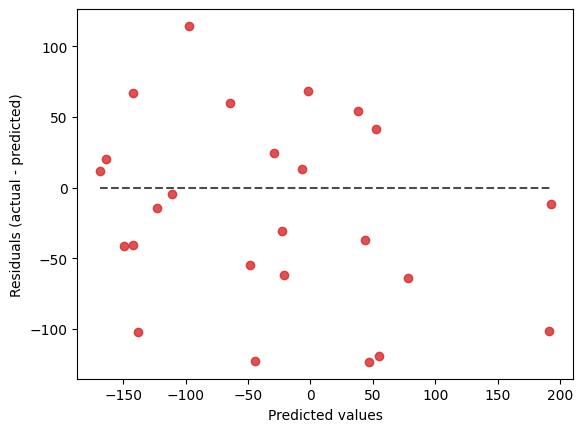

In [299]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

scaler = StandardScaler().fit(X_train)

# With scaled
X_scaled = scaler.transform(X_train)

model = LinearRegression().fit(X_scaled, y_train)

y_pred = model.predict(scaler.transform(X_test))

display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred, )

display.plot( scatter_kwargs={'color' : 'tab:red'})

print(r2_score(y_test, y_pred))


## Lasso

0.28136536630835673


/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/lordflaron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


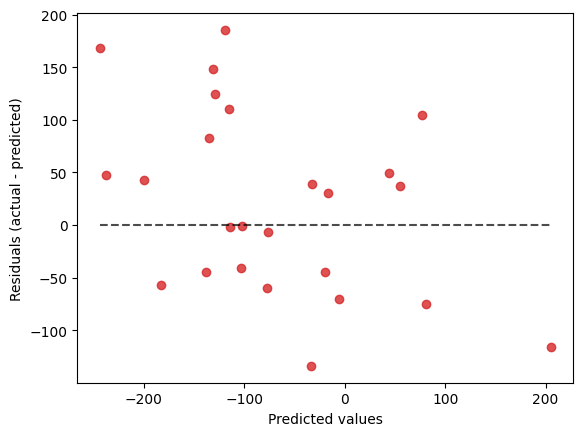

In [300]:
# Splitting data

scaler = StandardScaler().fit(X_train)

# With scaled
X_scaled = scaler.transform(X_train)

model = Lasso(alpha=0).fit(X_scaled, y_train)

y_pred = model.predict(scaler.transform(X_test))

display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred, )

display.plot(scatter_kwargs={'color' : 'tab:red'})

print(r2_score(y_test, y_pred))

# It looks like nothing we do 4


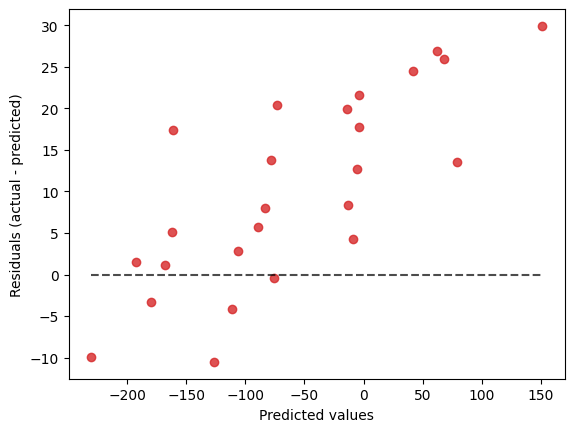

0.9786658106883367


0.31622776601683794

In [301]:
alphas = np.logspace(-4, -0.5, 30)

lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(5)

scaler = StandardScaler().fit(X_train)

# With scaled
X_scaled = scaler.transform(X_train)

lasso_cv.fit(X_scaled, y_train)

y_pred_lasso = lasso_cv.predict(X_test)

display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_lasso, )

display.plot(scatter_kwargs={'color' : 'tab:red'})

plt.show()

print(r2_score(y_test, y_pred_lasso))

lasso_cv.alpha_